<a href="https://colab.research.google.com/github/rzashfak/ML_practical/blob/main/House_prediction_by_area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# prompt: import utilities like pandas, numpy, matplotlib, linear model form sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# example usage (optional)
# Create a sample DataFrame
# data = {'x': [1, 2, 3, 4, 5], 'y': [2, 4, 5, 4, 5]}
# df = pd.DataFrame(data)

# Create a linear regression model
# model = LinearRegression()

# Fit the model to the data
# model.fit(df[['x']], df['y'])

# Make predictions
# predictions = model.predict(df[['x']])

# Plot the results
# plt.scatter(df['x'], df['y'])
# plt.plot(df['x'], predictions, color='red')
# plt.show()


In [40]:
df = pd.read_csv("house_prices.csv")
df.head(5)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [41]:
selected_colomn = df[['Index','Amount(in rupees)', 'Carpet Area']]
print (selected_colomn)

         Index Amount(in rupees) Carpet Area
0            0           42 Lac     500 sqft
1            1           98 Lac     473 sqft
2            2          1.40 Cr     779 sqft
3            3           25 Lac     530 sqft
4            4          1.60 Cr     635 sqft
...        ...               ...         ...
187526  187526           63 Lac          NaN
187527  187527           55 Lac          NaN
187528  187528           76 Lac    1250 sqft
187529  187529           30 Lac          NaN
187530  187530          1.18 Cr          NaN

[187531 rows x 3 columns]


In [42]:
# prompt: in previous chart there is some datas missing filla that

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("house_prices.csv")

# Displaying the first 5 rows
df.head(5)

selected_colomn = df[['Index','Amount(in rupees)', 'Carpet Area']]

def convert_to_number(amount):
  if isinstance(amount, str):
    if 'Lac' in amount:
      amount = float(amount.replace(' Lac', '')) * 100000
    elif 'Cr' in amount:
      amount = float(amount.replace(' Cr', '')) * 10000000
  # return amount
    elif 'Call for Price' in amount:
      return np.nan
    else:
      try:
        amount = float(amount)
        return amount
      except ValueError:
        return np.nan
    return amount

selected_colomn['Amount(in rupees)'] = selected_colomn['Amount(in rupees)'].apply(convert_to_number)


# Fill missing values in 'Amount(in rupees)' with the mean
selected_colomn['Amount(in rupees)'] = selected_colomn['Amount(in rupees)'].fillna(selected_colomn['Amount(in rupees)'].mean())

selected_colomn['Carpet Area'] = pd.to_numeric(selected_colomn['Carpet Area'].str.extract('(\d+)')[0], errors='coerce')
# Fill missing values in 'Carpet Area' with the median
selected_colomn['Carpet Area'] = selected_colomn['Carpet Area'].fillna(selected_colomn['Carpet Area'].median())


selected_colomn

<ipython-input-42-64c4b45c99f1>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_colomn['Amount(in rupees)'] = selected_colomn['Amount(in rupees)'].apply(convert_to_number)
<ipython-input-42-64c4b45c99f1>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_colomn['Amount(in rupees)'] = selected_colomn['Amount(in rupees)'].fillna(selected_colomn['Amount(in rupees)'].mean())
<ipython-input-42-64c4b45c99f1>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,Index,Amount(in rupees),Carpet Area
0,0,4200000.0,500.0
1,1,9800000.0,473.0
2,2,14000000.0,779.0
3,3,2500000.0,530.0
4,4,16000000.0,635.0
...,...,...,...
187526,187526,6300000.0,1000.0
187527,187527,5500000.0,1000.0
187528,187528,7600000.0,1250.0
187529,187529,3000000.0,1000.0


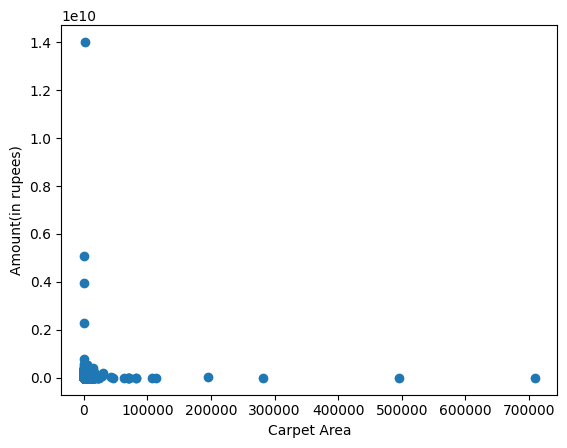

In [43]:
plt.xlabel('Carpet Area')
plt.ylabel('Amount(in rupees)')
# plt.xlim(0, 100000)  # Adjust x-axis limit as needed
# plt.ylim(0, 0.4)  # Adjust y-axis limit as needed
plt.scatter(selected_colomn['Carpet Area'], selected_colomn['Amount(in rupees)'])
plt.show()

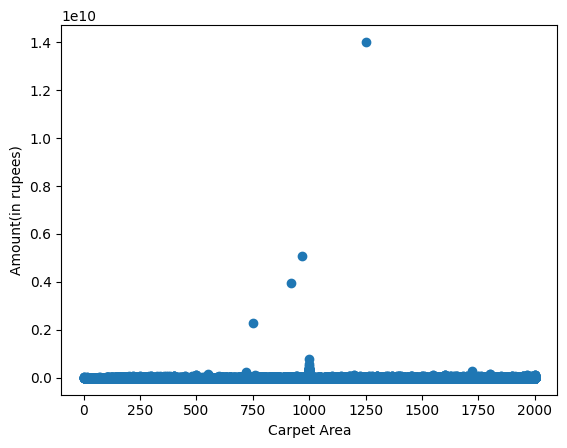

In [44]:
# ... (your previous code)

# Filter the dataset
selected_colomn = selected_colomn[selected_colomn['Carpet Area'] <= 2000]

# Now continue with your plotting or other analysis
plt.xlabel('Carpet Area')
plt.ylabel('Amount(in rupees)')
plt.scatter(selected_colomn['Carpet Area'], selected_colomn['Amount(in rupees)'])
plt.show()

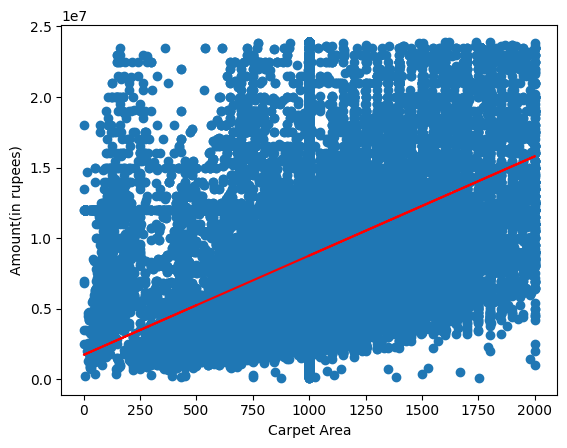

In [66]:
# Filter the dataset by Carpet Area
selected_colomn = selected_colomn[selected_colomn['Carpet Area'] <= 2000]

# Calculate the interquartile range (IQR) for prices
Q1 = selected_colomn['Amount(in rupees)'].quantile(0.25)
Q3 = selected_colomn['Amount(in rupees)'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outlier detection
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter the dataset by prices within the bounds
filtered_data = selected_colomn[
    (selected_colomn['Amount(in rupees)'] >= lower_bound) &
    (selected_colomn['Amount(in rupees)'] <= upper_bound)
]

# Now plot the filtered data
plt.xlabel('Carpet Area')
plt.ylabel('Amount(in rupees)')
plt.scatter(filtered_data['Carpet Area'], filtered_data['Amount(in rupees)'])
plt.plot(filtered_data['Carpet Area'], reg.predict(filtered_data[['Carpet Area']]), color='red')
plt.show()

In [67]:
reg = LinearRegression()
# reg.fit(df[['Carpet Area']], df['Amount(in rupees)'])
reg.fit(filtered_data[['Carpet Area']], filtered_data['Amount(in rupees)'])

LinearRegression()

In [57]:
reg.predict([[2000]]) # Reshape the input to a 2D array

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15796102.42112339])

In [61]:

reg_intercept = reg.intercept_
reg_intercept


1731611.4027806828

In [62]:
reg.coef_

array([7032.24550917])

In [63]:
7032.24550917*2000+1731611.4027806828

15796102.421120685